In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
from pyspark.sql import SparkSession

In [14]:
 spark = SparkSession.builder \
 .master("local") \
 .appName("Exercise1") \
    .getOrCreate()
 

In [15]:
pwd

'/home/jovyan'

In [21]:
df = spark.read.csv("/home/jovyan/e_shop_clothing_2008.csv", header=True, inferSchema=True, sep=';')

In [24]:
df.show(5, vertical=True)

-RECORD 0-----------------------
 year                    | 2008 
 month                   | 4    
 day                     | 1    
 order                   | 1    
 country                 | 29   
 session ID              | 1    
 page 1 (main category)  | 1    
 page 2 (clothing model) | A13  
 colour                  | 1    
 location                | 5    
 model photography       | 1    
 price                   | 28   
 price 2                 | 2    
 page                    | 1    
-RECORD 1-----------------------
 year                    | 2008 
 month                   | 4    
 day                     | 1    
 order                   | 2    
 country                 | 29   
 session ID              | 1    
 page 1 (main category)  | 1    
 page 2 (clothing model) | A16  
 colour                  | 1    
 location                | 6    
 model photography       | 1    
 price                   | 33   
 price 2                 | 2    
 page                    | 1    
-RECORD 2-

In [25]:
df.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- order: integer (nullable = true)
 |-- country: integer (nullable = true)
 |-- session ID: integer (nullable = true)
 |-- page 1 (main category): integer (nullable = true)
 |-- page 2 (clothing model): string (nullable = true)
 |-- colour: integer (nullable = true)
 |-- location: integer (nullable = true)
 |-- model photography: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- price 2: integer (nullable = true)
 |-- page: integer (nullable = true)



In [29]:
df.describe().show(vertical=True)

-RECORD 0--------------------------------------
 summary                 | count               
 year                    | 165474              
 month                   | 165474              
 day                     | 165474              
 order                   | 165474              
 country                 | 165474              
 session ID              | 165474              
 page 1 (main category)  | 165474              
 page 2 (clothing model) | 165474              
 colour                  | 165474              
 location                | 165474              
 model photography       | 165474              
 price                   | 165474              
 price 2                 | 165474              
 page                    | 165474              
-RECORD 1--------------------------------------
 summary                 | mean                
 year                    | 2008.0              
 month                   | 5.585886604542103   
 day                     | 14.5245537063

In [41]:
from pyspark.sql.functions import col, count, when

In [38]:
df.distinct().count()

165474

In [39]:
df.count()

165474

In [49]:
missing_val = df.select([count(when(col(c).isNull(),c)).alias(c) for c in df.columns])
missing_val.show()
print(type(missing_val))

+----+-----+---+-----+-------+----------+----------------------+-----------------------+------+--------+-----------------+-----+-------+----+
|year|month|day|order|country|session ID|page 1 (main category)|page 2 (clothing model)|colour|location|model photography|price|price 2|page|
+----+-----+---+-----+-------+----------+----------------------+-----------------------+------+--------+-----------------+-----+-------+----+
|   0|    0|  0|    0|      0|         0|                     0|                      0|     0|       0|                0|    0|      0|   0|
+----+-----+---+-----+-------+----------+----------------------+-----------------------+------+--------+-----------------+-----+-------+----+

<class 'pyspark.sql.dataframe.DataFrame'>


In [50]:
missing_val = df.select([count(when(col(c).isNull(),c)).alias(c) for c in df.columns]).toPandas()
print(missing_val)
print(type(missing_val))

   year  month  day  order  country  session ID  page 1 (main category)  \
0     0      0    0      0        0           0                       0   

   page 2 (clothing model)  colour  location  model photography  price  \
0                        0       0         0                  0      0   

   price 2  page  
0        0     0  
<class 'pandas.core.frame.DataFrame'>


In [62]:
import matplotlib.pyplot as plt

<Figure size 720x432 with 0 Axes>

<BarContainer object of 47 artists>

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Number of Orders')

Text(0.5, 1.0, 'Distribution of Orders by Country')

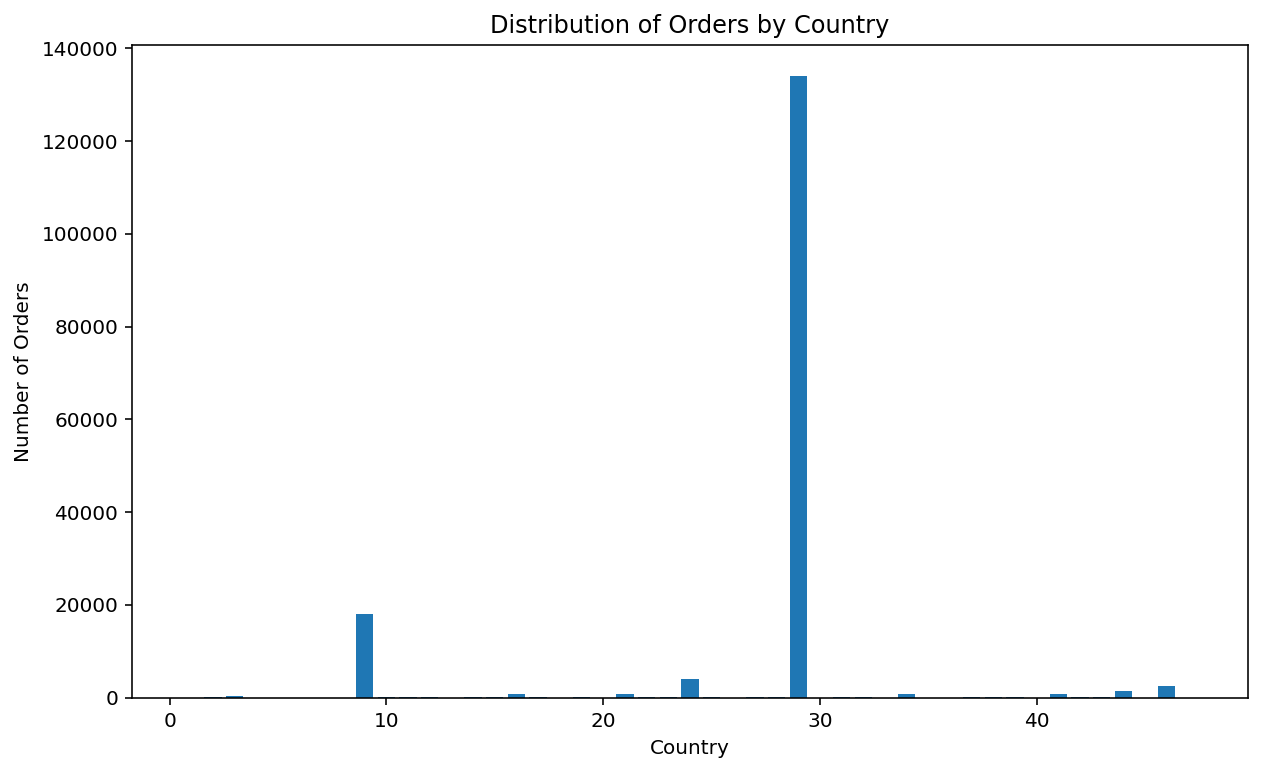

In [65]:
country_counts = df.groupBy("country").count().orderBy("count", ascending=False).toPandas()
plt.figure(figsize=(10, 6)) 
plt.bar(country_counts["country"], country_counts["count"])
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.title("Distribution of Orders by Country")
plt.show()

<Figure size 720x432 with 0 Axes>

<BarContainer object of 14 artists>

Text(0.5, 0, 'Colours')

Text(0, 0.5, 'Number of Orders')

Text(0.5, 1.0, 'Distribution of Orders by Colour')

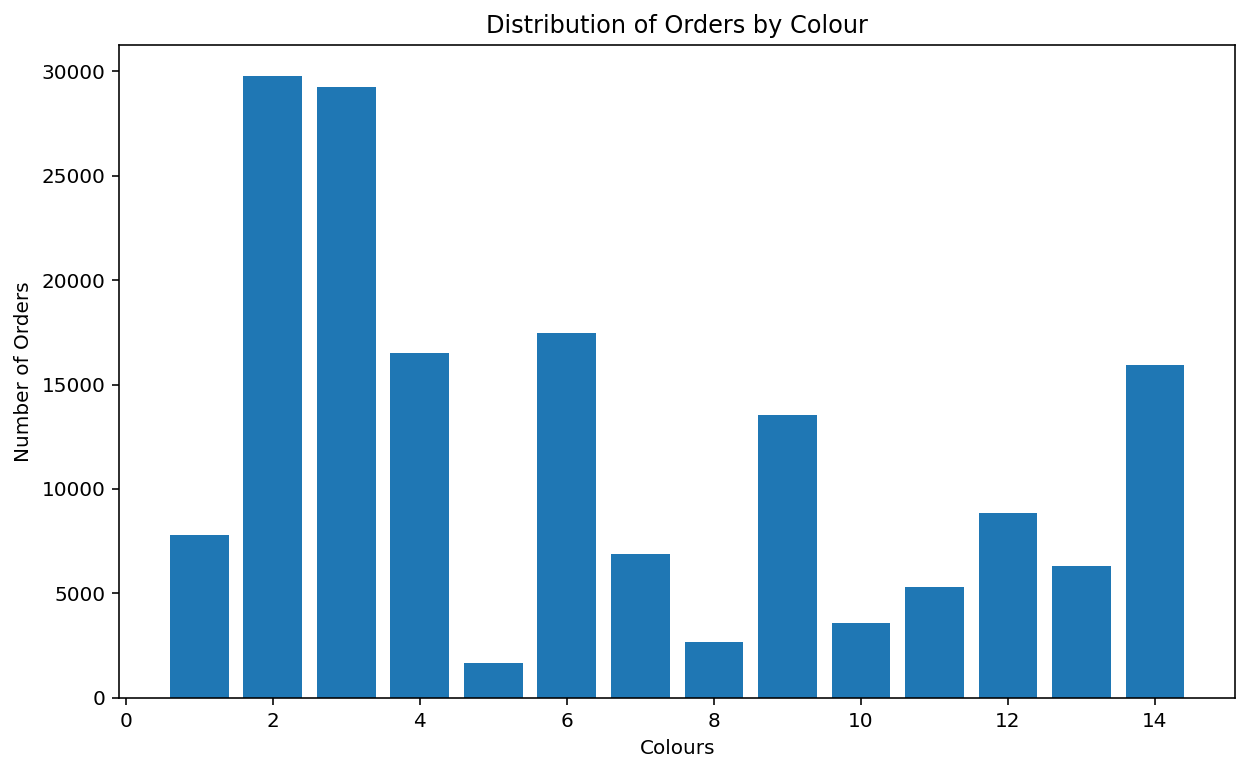

In [69]:
color_counts = df.groupBy("colour").count().orderBy("count", ascending=True).toPandas()
plt.figure(figsize=(10, 6)) 
plt.bar(color_counts["colour"], color_counts["count"])
plt.xlabel("Colours")
plt.ylabel("Number of Orders")
plt.title("Distribution of Orders by Colour")
plt.show()

<Figure size 720x432 with 0 Axes>

<BarContainer object of 20 artists>

Text(0.5, 0, 'US Price')

Text(0, 0.5, 'Number of Orders')

Text(0.5, 1.0, 'Distribution of Orders by US Price')

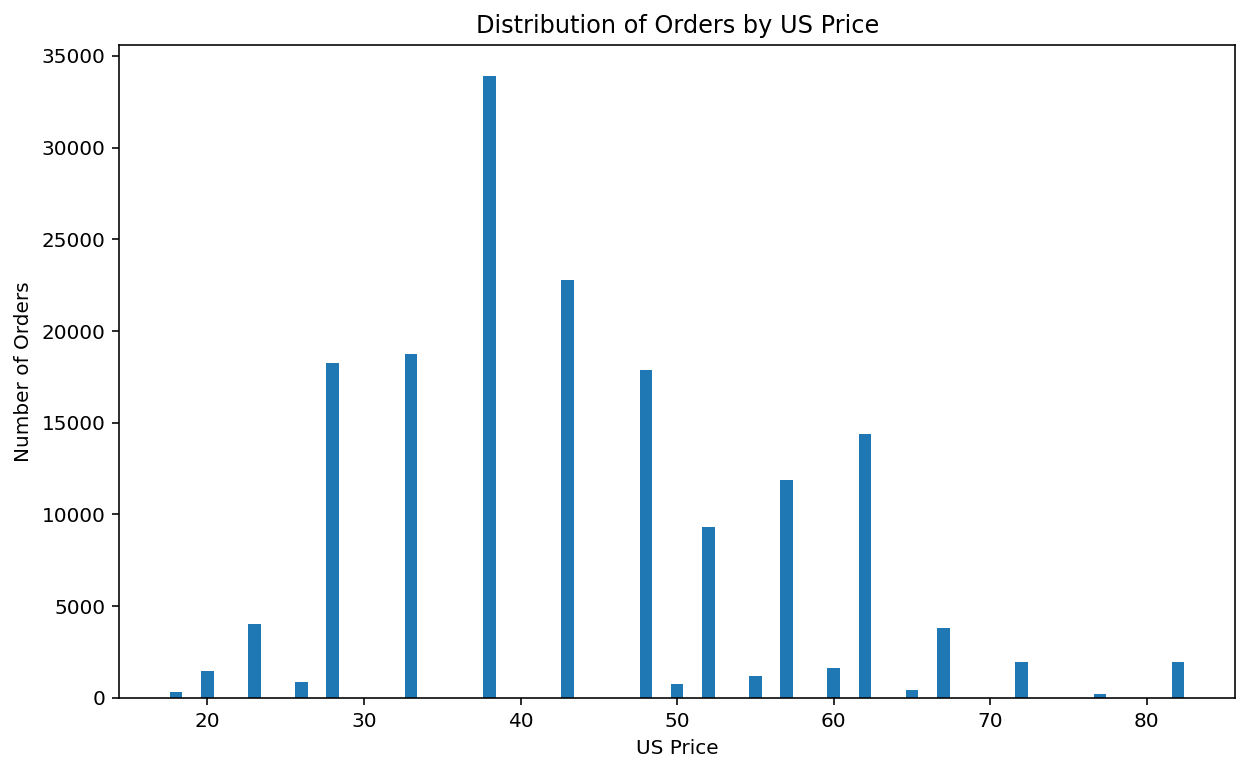

In [70]:
price_counts = df.groupBy("price").count().orderBy("count", ascending=True).toPandas()
plt.figure(figsize=(10, 6)) 
plt.bar(price_counts["price"], price_counts["count"])
plt.xlabel("US Price")
plt.ylabel("Number of Orders")
plt.title("Distribution of Orders by US Price")
plt.show()

In [71]:
##support vs confidence vs lift 

In [72]:
##association rules

In [73]:
##Correlation

In [74]:
##Network graph

In [75]:
##seaborn

In [76]:
##boxplot